<a href="https://colab.research.google.com/github/krmiddlebrook/intro_to_deep_learning/blob/master/machine_learning/mini_lessons/image_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Processing Image Data
Computer vision is a field of machine learning that trains computers to interpret and understand the visual world. It is one of the most popular fields in deep learning (neural networks). In computer vision, it is common to use digital images from cameras and videos to train models to accurately identify and classify objects. 

Before we can solve computer vision tasks, it is important to understand how to handle  image data. To this end, we will demonstrate how to process (prepare) image data for machine learning models. 

We will use the MNIST digits dataset, which is provided by Kera Datasets--a collection of ready-to-use datasets for machine learning. All datasets are available through the `tf.keras.datasets` API endpoint. 

Here is the lesson roadmap:
- Load the dataset
- Visualize the data
- Transform the data
- Normalize the data

In [ ]:
# TensorFlow and tf.keras and TensorFlow datasets
import tensorflow as tf
from tensorflow import keras

# Commonly used modules
import numpy as np

# Images, plots, display, and visualization
import matplotlib.pyplot as plt

# Load the dataset
When we want to solve a problem with machine learning methods, the first step is almost always to find a good dataset. As we mentioned above, we will retrieve the MNIST dataset using the `tf.keras.datasets` module. 

The MNIST dataset contains 70k grayscale images of handwritten digits (i.e., numbers between 0 and 9). Let's load the dataset into our notebook.

In [ ]:
# the data, split between train and test sets
(train_features, train_labels), (test_features, test_labels) = keras.datasets.mnist.load_data()

print(f"training set shape: {train_features.shape}")
print(f"test set shape: {test_features.shape}")

print(f'dtypes of training and test set tensors: {train_features.dtype}, {test_features.dtype}')


training set shape: (60000, 28, 28)
test set shape: (10000, 28, 28)
dtypes of training and test set tensors: uint8, uint8


We see that TensorFlow Datasets takes care of most of the processing we need to do. The `training_features` object tells us that there are 60k training images, and the `test_features` indicates there are 10k test images, so 70k total. We also see that the images are tensors of shape ($28 \times 28$) with integers of type uint8.


## Visualize the dataset
Now that we have the dataset, let's visualize some samples.

We will use the matplotlib plotting framework to display the images. Here are the first 5 images in the training dataset.



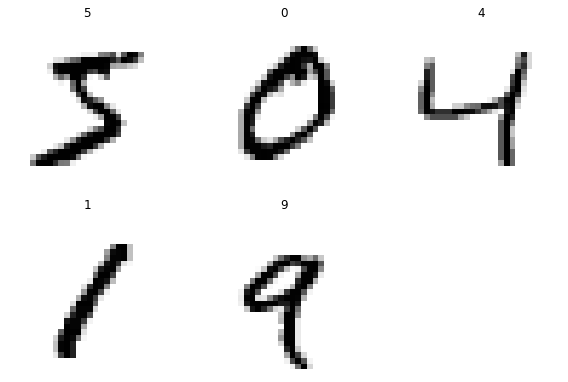

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(5):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(train_features[i], cmap=plt.cm.binary)
    plt.title(int(train_labels[i]))
    plt.axis("off")

The above images give us a sense of the data, including samples belonging to different classes. 

# Transforming the data
Before we start transforming data, let's discuss *tensors*--a key part of the machine learning (ML) process, particularly for deep learning methods. 

As we learned in previous lessons, data, whether it be categorical or numerical in nature, is converted to a numerical representation. This process makes the data useful for machine learning models. In deep learning (neural networks), the numerical data is often stored in objects called *tensors*. A tensor is a container that can house data in $N$ dimensions. ML researchers sometimes use the term "tensor" and "matrix" interchangeably because a matrix is a 2-dimensional tensor. But, tensors are generalizations of matrices to $N$-dimensional space. 

<figure>
  <img src='https://www.kdnuggets.com/wp-content/uploads/scalar-vector-matrix-tensor.jpg' width='75%'>
  <figcaption>A scalar, vector ($2 \times 1$), matrix ($2 \times 1$), and tensor ($2 \times 2 \times 2$) .</figcaption>
</figure>

In [ ]:
# a (2 x 2 x 2) tensor
my_tensor = np.array([
              [[1, 2], [3, 2]],
              [[1, 7],[5, 4]]
            ])

print('my_tensor shape:', my_tensor.shape)

my_tensor shape: (2, 2, 2)


Now let's discuss how images are stored in tensors. Computer screens are composed of pixels. Each pixel generates three colors of light (red, green, and blue) and the different colors we see are due to different combinations and intensities of these three primary colors.   

<figure>
  <img src='https://www.chem.purdue.edu/gchelp/cchem/RGBColors/BlackWhiteGray.gif' width='75%'>
  <figcaption>The colors black, white, and gray with a sketch of a pixel from each.</figcaption>
</figure>

We use tensors to store the pixel intensities for a given image. Colorized pictures have 3 different *channels*. Each channel contains a matrix that represents the intensity values that correspond to the pixels of a particular color (red, green, and blue; RGB for short). For instance, consider a small colorized $28 \times 28$ pixel image of a dog. Because the dog image is colorize, it has 3 channels, so its tensor shape is ($28 \times 28 \times 3$).

Let's have a look at the shape of the images in the MNIST dataset.

In [ ]:
train_features[0, :, :].shape

(28, 28)

Using the `train_features.shape` method, we can extract the image shape and see that images are in the tensor shape $28 \times 28$. The returned shape has no 3rd dimension, this indicates that we are working with grayscale images. By grayscale, we mean the pixels don't have intensities for red, green, and blue channels but rather for one grayscale channel, which describes an image using combinations of various shades of gray. Pixel intensities range between $0$ and $255$, and in our case, they correspond to black $0$ to white $255$.  


Now let's reshape the images into $784 \times 1$ dimensional tensors. We call converting an image into an $n \times 1$ tensor "flattening" the tensor. 

In [ ]:
# get a subset of 5 images from the dataset
original_shape = train_features.shape

# Flatten the images.
input_shape = (-1, 28*28)
train_features = train_features.reshape(input_shape)
test_features = test_features.reshape(input_shape) 

print(f'original shape: {original_shape}, flattened shape: {train_features.shape}')

original shape: (60000, 28, 28), flattened shape: (60000, 784)


We flattened all the images by using the NumPy `reshape` method. Since one shape dimension can be -1, and we may not always know the number of samples in the dataset we used $(-1,784)$ as the parameters to `reshape`. In our example, this means that each $28 \times 28$ image gets flattened into a $28 \cdot 28 = 784$ feature array. Then the images are stacked (because of the -1) to produce a final large tensor with shape $(\text{num samples}, 784$).



# Normalize the data
Another important transformation technique is *normalization*.  We normalize data before training the model with it to encourage the model to learn generalizable features, which should lead to better results on unseen data. 

At a high level, normalization makes the data more, well...normal. There are various ways to normalize data. Perhaps the most common normalization approach for image data is to subtract the mean pixel value and divide by the standard deviation (this method is applied to every pixel).

 

Before we can do any normalization, we have to cast the "uint8" tensors to the "float32" numeric type.

In [ ]:
# convert to float32 type 
train_features = train_features.astype('float32')
test_features = test_features.astype('float32')

Now we can normalize the data. We should mention that you always use the training set data to calculate normalization statistics like mean, standard deviation, etc.. Consequently, the test set is always normalized with the training set statistics.

In [ ]:
# normalize the reshaped images
mean = train_features.mean()
std = train_features.std()

train_features -= mean
train_features /= std

test_features -= mean
test_features /= std

print(f'pre-normalization mean and std: {round(mean, 4)}, {round(std, 4)}')
print(f'normalized images mean and std: {round(train_features.mean(), 4)}, {round(train_features.std(), 4)}')

pre-normalization mean and std: 33.31840133666992, 78.56739807128906
normalized images mean and std: -0.0, 1.0


As the output above indicates, the normalized pixel values are now centered around 0 (i.e., mean = 0) and have a standard deviation of 1.

# Summary
In this lesson we learned:
- Keras offers ready-to-use datasets.
- Images are represented by *tensors*
- Tensors can be transformed (reshaped) and normalized easily using NumPy (or any other frameworks that enable tensor operations).
  